# **Aprendizaje supervisado**
# SL05. Bias & Variance

## <font color='blue'>**Introducción Bias y Variance**</font>

Cuando desarrollamos un modelo de Machine Learning, dedicamos gran parte de nuestro esfuerzo en lograr la mayor precisión posible, pero la realidad es que no se puede construir modelos 100% precisos ya que nunca pueden estar libres de errores.

Comprender cómo las diferentes fuentes de error generan __bias__ (sesgo) y __variance__ (varianza) nos ayudara a mejorar el proceso de ajuste de datos, lo que resulta en modelos más precisos. Adicionalmente, también mos ayudará a evitar el error de sobreajuste (__overfitting__) y falta de ajuste (__underfitting__).

En un sistema real, no podemos manejar simultáneamente el bias y el variance. Si se desea reducir el bias del modelo, aumentará el variance hasta cierto punto y viceversa. La razón fundamental de este fenómeno es que siempre queremos intentar estimar datos reales ilimitados con muestras de entrenamiento limitadas.

Cuando creemos más en la autenticidad de estos datos e ignoramos el conocimiento previo del modelo, haremos todo lo posible para garantizar la precisión del modelo en las muestras de entrenamiento, lo que puede reducir el bias del modelo. Sin embargo, el modelo aprendido de esta manera puede perder cierta capacidad de generalización, lo que provocará un ajuste excesivo, reducirá el rendimiento del modelo en datos reales y aumentará la incertidumbre del modelo. Por el contrario, si creemos más en nuestro conocimiento previo del modelo y agregamos más restricciones al modelo en el proceso de aprendizaje del modelo, podemos reducir el variance del modelo y mejorar la estabilidad del modelo, pero también aumentar el bias del modelo. La compensación entre **bias** y **variance** es uno de los temas básicos del Machine Learning.

### Bias
El error debido al Bias de un modelo corresponde a la diferencia entre el valor esperado del estimador (es decir, la predicción media del modelo) y el valor real. Cuando se dice que un modelo tiene un bias muy alto quiere decir que el modelo es muy simple y no se ha ajustado a los datos de entrenamiento (underfitting), por lo que produce un error alto en todas los conjuntos (entrenamiento, validación y test).

Los algoritmos de Machine Learning con __bajo bias__ incluyen: Decision Trees (árboles de decisión), k-Nearest Neighbors (KNN, k-vecinos más cercanos) y Support Vector Machines (SVM, máquinas de soporte vectorial). Por su parte, los algoritmos con __alto bia__s incluyen: Linear Regression (regresión lineal), Linear Discriminant Analysis (LDA, análisis discriminante lineal) y Logistic Regression (regresión logística).

![Link](https://i.ibb.co/DV1wGCF/bias.png)

### Variance
El _variance_ de un estimador es cuánto varía la predicción según los datos que utilicemos para el entrenamiento.

La mayoría de algoritmos de Machine Learning aprenden según van entrando datos de entrenamiento. Así que es normal que todos los modelos tengan cierta varianza. Idealmente no debería cambiar demasiado de un conjunto de datos de entrenamiento a otro, lo que significa que el algoritmo es bueno para elegir el mapeo subyacente oculto entre las variables de entrada y de salida.

Un modelo con bajo _variance_ indica que cambiar los datos de entrenamiento produce cambios pequeños en la estimación.
Al contrario, un modelo con alto _variance_ quiere decir que pequeños cambios en el dataset se traducen en grandes cambios en la salida (overfitting).

Los algoritmos de Machine Learning que tienen un alto _variance_ están fuertemente influenciados por las particularidades de los datos de entrenamiento. Esto significa que los detalles del entrenamiento influyen en el número y tipo de parámetros utilizados para caracterizar la función de mapeo.

En general, los algoritmos que tienen mucha flexibilidad (representan muy ien la data de entrenamiento) tienen un altp _variance_. Por ejemplo, los árboles de decisión tienen una variación alta, que es aún mayor si los árboles no se podan antes de usarlos.

Los ejemplos de algoritmos de aprendizaje automático de __bajo variance__ incluyen: regresión lineal, análisis discriminante lineal y regresión logística.

Los ejemplos de algoritmos de aprendizaje automático de __alto variance__ incluyen: árboles de decisión, k-vecinos más cercanos y máquinas de vectores de soporte.

Los algoritmos que suelen tener un error de bias alto suelen tener una varianza baja. A su vez, los que tienen bias bajo suelen tener varianza alta.

![Link](https://i.ibb.co/h7kjxHJ/variance.png)

Al construir un modelo debemos apuntar a que **tenga poco bias y poco variance**. Esto es lo que se llamaría un **modelo robusto**.

![Link](https://i.ibb.co/Cpcn1q5/tradeoff.png)

## <font color='blue'>**Definiendo la función y su error**</font>

Consideremos el siguiente caso:

1. $\hat{x}$, es un conjunto de variables independientes 
2. $y$, corresponde a la variable observada que puede tener un ruido $\epsilon$ (error irreducible). 
<br>
$$y = f(x) + \epsilon$$
<br>
3. Las características de este ruido son: 
<br>
$$ \mathbb{E}[\epsilon] = 0 \\
 \mbox{var}(\epsilon)= \sigma_{\epsilon}^2
$$
<br>
4. Si $\hat{f}$ es la función estimada a través de una muestra de los datos
5. El error cuadrático medio (__MSE__) es:
$$
\mbox{MSE} = \mathbb{E}[(y-\hat{f}(x))^2]
$$
6. El _bias_: 

$$
\mbox{Bias}[\hat{f}(x)] = \mathbb{E}[\hat{f}(x)] - f(x)
$$
7. El _variance_: 
$$
\mbox{var}(\hat{f}(x))= \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]
$$

Con la información anterior, podemos definir el **Error Total** como:
<br><br>
$$
\large\color{green}{\mathbb{E}[\mathbb{E}[(y - \hat{f}(x))^2]]} = \color{magenta}{\mathbb{E}[bias[\hat{f}(x)]^2]} + \color{blue}{\mathbb{E}[var(\hat{f}(x))]} + \color{red}{\sigma_e^2}
$$
<br>
![](https://i.ibb.co/7zY3CqT/error-total.png)

Un buen modelo predictivo será el que tenga un buen balance entre _bias_ y _variance_ de manera que se minimice el _error total_.


## <font color='blue'>**Contruccion del dataset**</font>



```
def f(x):
    return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2
```



```
def Ruido(x_max,x_test): 
    
    x = x_max * (2 * np.random.rand(N) - 1)
    epsilon = sigma_epsilon * np.random.randn(N) # Media 0 and varianza 1
    y = f(x) + epsilon
    y_test = f(x_test) + sigma_epsilon * np.random.randn()
    return x, y , x_test, y_test
```



```
def grafica(x,y):
    plt.figure(figsize=(12, 6))
    x_range = np.linspace(-x_max, x_max, 1000)
    plt.scatter(x, y) # Los puntos con ruido
    plt.plot(x_range, f(x_range), 'r', linewidth=3.0) # La función original
    plt.scatter(x_test, y_test, c='r') # El punto test 
    plt.xlabel('x', size=12)
    plt.ylabel('y', size=12)
    plt.xticks(np.arange(-x_max, x_max + 1))
    plt.show()
```







In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2

def Ruido(x_max,x_test): 
    
    x = x_max * (2 * np.random.rand(N) - 1)
    epsilon = sigma_epsilon * np.random.randn(N) # Media 0 and varianza 1
    y = f(x) + epsilon
    x_test = x_max * (2 * np.random.rand(int(N/4)) - 1)
    y_test = f(x_test) + sigma_epsilon * np.random.randn(int(N/4))
    return x, y , x_test, y_test

def grafica(x,y):
    plt.figure(figsize=(12, 6))
    x_range = np.linspace(-x_max, x_max, 1000)
    plt.scatter(x, y, alpha=0.5) # Los puntos con ruido
    plt.plot(x_range, f(x_range), 'r', linewidth=3.0) # La función original
    plt.scatter(x_test, y_test, c='r', alpha=0.5) # El punto test 
    plt.xlabel('x', size=12)
    plt.ylabel('y', size=12)
    plt.xticks(np.arange(-x_max, x_max + 1))
    plt.show()



(250,)
(250,)


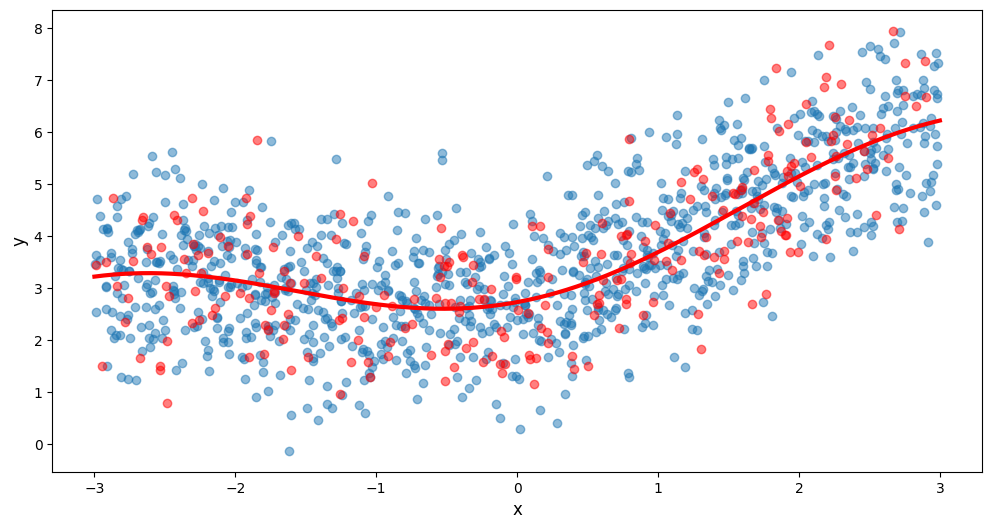

In [ ]:
sigma_epsilon = 1
N = 1000
x_max = 3
x_test = 3.2
x, y , x_test, y_test = Ruido(x_max,x_test)
print(x_test.shape)
print(y_test.shape)
grafica(x,y)

### Modelemos el problema como una regresión

$$ \hat{f}(x) = \omega_0 + \omega_1x + \omega_2 x^2 + ...+ \omega_n x^n$$

Es decir intentamos aproximar $y(x)$ con $\hat{f}(x)$ como se describe en la ecuación anterior. 

Ahora, supongamos que solo podríamos usar 20 puntos (de los 1,000) para entrenar nuestro modelo de regresión polinómica y consideramos cuatro modelos de regresión diferentes, uno con grado $n = 1$ (línea simple), uno con $n = 2$, $n = 3$ y $n = 4$. Si tomamos muestras de forma aleatoria de 20 puntos de la población subyacente y repetimos este experimento 6 veces, este es un posible resultado que obtenemos.

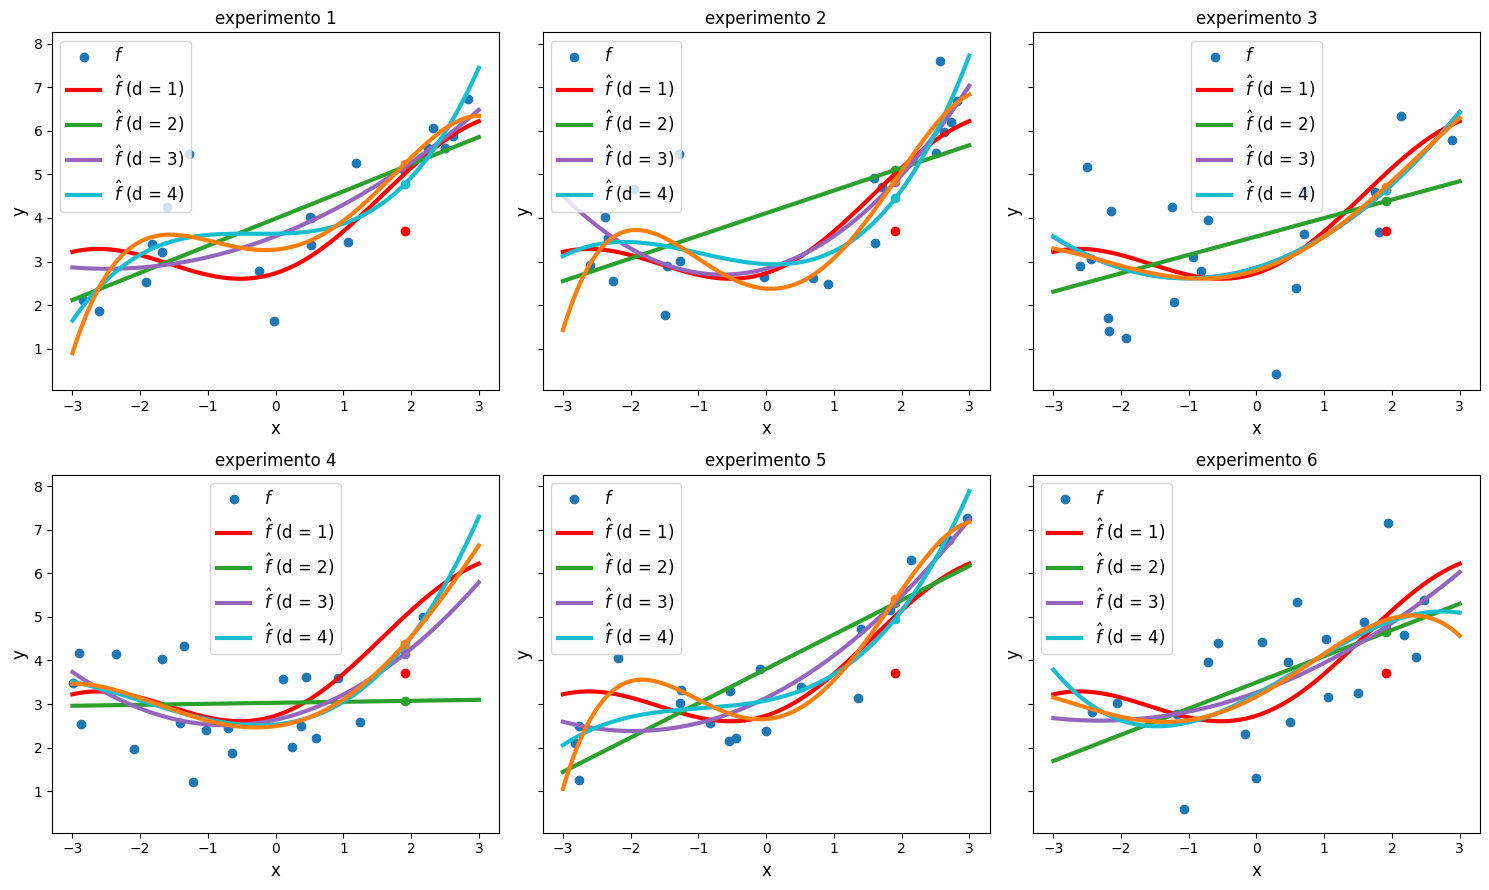

In [ ]:
def f_hat(x, w):
    d = len(w) - 1
    # Calcula el valor para los distintos polinomios.
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

n = int(.02 * N) # n es el tamaño de la muestra, 20 para este ejemplo.
#x_test = 3.2 # Puntoa verificar. 
x_range = np.linspace(-x_max, x_max, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])
d_arr = [1, 2, 3, 4] # DImsensión del polinomio. 

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
# 6 casos
for i in range(2):
    for j in range(3):
        idx = np.random.permutation(N)[:n] # Obtenemos los indices de los 20 puntos en forma aleatoria
        x_train, y_train = x[idx], y[idx] # Obtenemos los 20 puntos. 
        
        w = []
        for d in d_arr: # Los distintos modelos.
            w.append(np.polyfit(x_train, y_train, d)) # Ajustamos a distintos grados de polinomios . 
                
        axs[i, j].scatter(x_train, y_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
            
        axs[i, j].scatter(x_test, y_test, c='r')
        for k in range(len(w)):
            axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])
                
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ (d = 1)', r'$\hat{f}$ (d = 2)', 
                          r'$\hat{f}$ (d = 3)', r'$\hat{f}$ (d = 4)'], fontsize=12)
        axs[i, j].title.set_text('experimento {}'.format(cnt))
        cnt += 1
plt.tight_layout()
plt.show()

### Simulemos muchos casos

Ahora, supongamos que simulamos 10,000 experimentos diferentes al muestrear aleatoriamente cada 20 puntos de la población subyacente para que sirvan como nuestros datos de entrenamiento. En cada experimento, aprendemos un $f$  diferente vinculado a los datos de entrenamiento de ese experimento. Si para un punto de prueba no visto $x$, evaluamos $\hat{f}(x)$ para cada experimento, reuniremos 10,000 valores para $\hat{f}(x)$. Hacemos esto para los disitintos modelos y generamos un histograma. 


In [ ]:
x_test = x_max * (2 * np.random.rand())
y_test = f(x_test) + sigma_epsilon * np.random.randn()
print(x_test)
print(y_test)

0.3720695079145737
1.2940196884408621


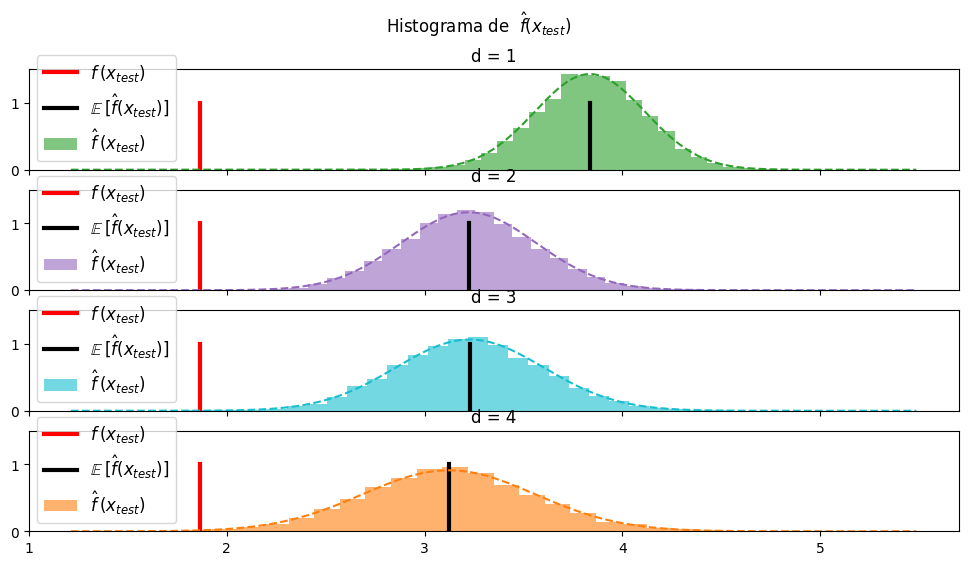

In [ ]:
R = 10000
#d_arr = [1, 2, 3, 5]
y_hat_test = np.zeros((len(d_arr), R))

for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        y_hat_test[k, r] = f_hat(x_test, w)

y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)

fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(12, 6))
#d_arr = [1, 2]

for z in d_arr:
    k = z -1
    axs[k].hist(y_hat_test[k], density=True, color=colors[k], alpha=0.6,bins=30)             
    xlim = axs[k].get_xlim()
    axs[k].plot([f(x_test), f(x_test)], [0, 1], 'r', linewidth=3.0)
    axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0, 1], c='k', linewidth=3.0)
    axs[k].title.set_text('d = {}'.format(d_arr[k]))
    axs[k].legend([r'$f\:(x_{test})$', r'$\mathbb{E}\:[\hat{f}(x_{test})]$', r'$\hat{f}\:(x_{test})$'], fontsize=12)
    
for k in range(4):
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k], y_hat_test_std[k]), color=colors[k], ls='--')
    
plt.suptitle(r'Histograma de  $\hat{f}(x_{test})$', size=12)
plt.show()

Ahora consideremos 1,000 puntos de prueba y calculemos el MSE de prueba promedio (sobre estos puntos). También calculamos el sesgo cuadrado promedio (sobre estos 1,000 puntos de prueba) y la varianza promedio. Si hacemos esto para cinco modelos, desde el grado $d = 0$ (línea horizontal) hasta el grado $d = 4$, obtenemos la siguiente gráfica.

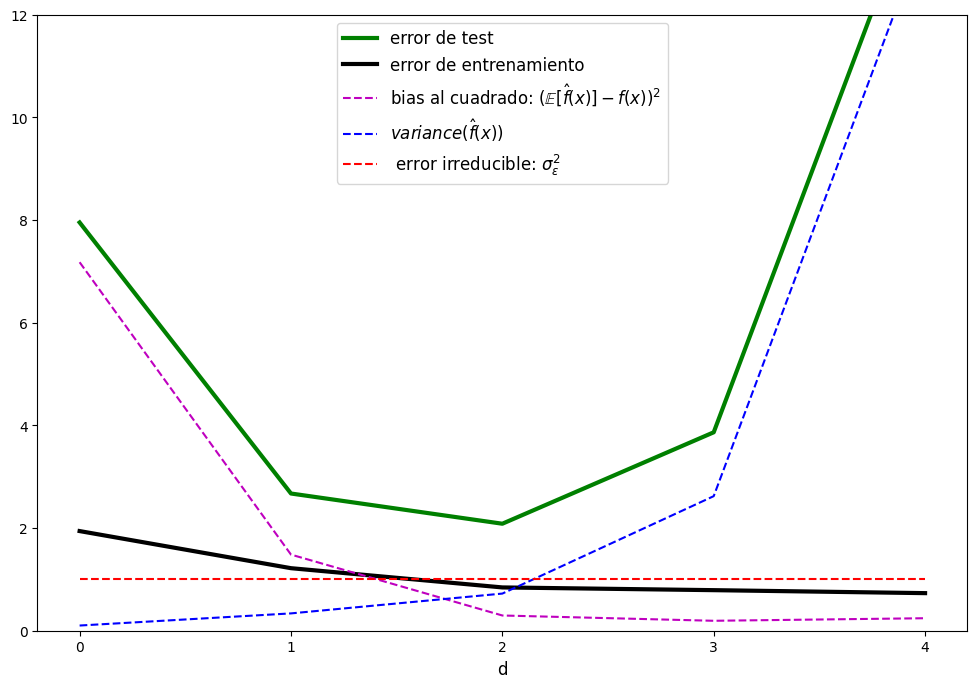

In [ ]:
# EL número de la muestra total
R = 10000
N = 1000
x_max = 3
# rango utilizado en la contrucción del modelo
n = int(.02 * N)
n_test = 1000
d_arr = np.arange(5)
# Generamos nuestro dataset.
x_test = x_max + np.random.rand(n_test) - .5

epsilon = sigma_epsilon * np.random.randn(n_test)
# Modelamos con un ruido.
y_test = f(x_test) + epsilon

train_squared_error = np.zeros((len(d_arr), R))
y_hat_test = np.zeros((len(d_arr), R, n_test))
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        train_squared_error[k, r] = np.mean((y_train - f_hat(x_train, w)) ** 2)
        y_hat_test[k, r, :] = f_hat(x_test, w)

test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)
bias_squared = (np.mean(y_hat_test, 1) - f(x_test)) ** 2
var_y_hat_test = np.var(y_hat_test, 1)

plt.figure(figsize=(12, 8))
plt.plot(d_arr, np.mean(test_squared_error, 1), 'g', linewidth=3.0)
plt.plot(d_arr, np.mean(train_squared_error, 1), 'k', linewidth=3.0)
plt.plot(d_arr, np.mean(bias_squared, 1), 'm--')
plt.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--')
plt.plot(d_arr, (sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
# plt.plot(d_arr, np.mean(bias_squared + var_y_hat_test + sigma_epsilon ** 2, 1), 'm--')
plt.xticks(d_arr)
plt.xlabel('d', size=12)
plt.legend(['error de test', 'error de entrenamiento', r'bias al cuadrado: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$variance (\hat{f}(x))$', r' error irreducible: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
plt.ylim([0, 12])
plt.show()

$$
\large \color{green}{\mathbb{E}[\mathbb{E}[(y - \hat{f}(x))^2]]} = \color{magenta}{\mathbb{E}[bias[\hat{f}(x)]^2]} + \color{blue}{\mathbb{E}[var(\hat{f}(x))]} + \color{red}{\sigma_e^2}
$$

In [ ]:
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, alpha=0.5) # Los puntos con ruido
    plt.scatter(x_test, y_test, c='r', alpha=0.5) # El punto test 
    plt.xlabel('x', size=12)
    plt.ylabel('y', size=12)
    plt.xticks(np.arange(-x_max, x_max + 1))
    plt.show()

Comprender el _bias_ y el _variance_ es fundamental para entender el comportamiento de los modelos de predicción, pero en general lo que realmente importa es el _error general_, no la descomposición específica. El punto ideal para cualquier modelo es el nivel de complejidad en el que el aumento en el _bias_ es equivalente a la reducción en el _variance_.

**RECORDAR**:
No hay escapatoria a la relación entre _bias_ y _variance_ en Machine Learning:
* Aumentar el sesgo disminuirá la varianza.
* Aumentar la varianza disminuirá el sesgo.

Existe una relación de intercambio entre estas dos preocupaciones, el sesgo y la varianza proporcionan las herramientas para comprender el comportamiento de los algoritmos de aprendizaje automático en la búsqueda del mejor rendimiento predictivo.

![Link](https://i.ibb.co/2jjD33V/cuadrante.png)